In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [39]:
pd.set_option('display.max_rows', None)

In [4]:
dataset_path = Path(r"/home/rwth1591/transfer-learning/blue_waters/data/blue_waters_dataset_processed/blue_waters_posix_withapps_no_outliers_no_time.csv")

In [5]:
df_no_outliers = pd.read_csv(dataset_path)

In [6]:
len(df_no_outliers)

686029

In [7]:
df_no_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,app
0,3114,-20,-20,75409,41501580,61075,3178,0,0,-20,...,0,0,0,0,0,0,-1,213.412935,64,vasp_gam
1,24578,-1010,-1010,2135401,1583602,2345250,248139,0,1,-1010,...,116,0,0,0,0,0,0,413.544116,48,SpEC
2,1120,-73,-73,24831,194999,1194,1691,0,0,-73,...,320,0,0,0,0,0,0,5.714256,32,pw.x
3,2,-3,-3,0,0,0,2,0,0,-3,...,0,0,0,0,0,0,-1,0.015716,1,ApplyObservers
4,40658,-1064,-1064,4264010,3582318,5439002,450505,0,1,-1064,...,451,0,0,0,0,0,0,261.567515,48,SpEC


In [11]:
df_no_outliers.app.unique()

array(['vasp_gam', 'SpEC', 'CCTM_v52_Linux2_x86_64intel', 'pw.x',
       'ApplyObservers', 'gofr.x', 'mosst_dynamo.x', 'lmp_xe6_kc_s',
       'scheduler.x', 'enzo.exe', 'flash4', 'Spells', 'cp.x', 'nwchem',
       'lmp_kc_dep', 'ior', 'caliop', 'a2', 'mdtest', 'PIOL-FFD',
       'Hsigma', 'nek5000', 'lmp_new', 'rad', 'split_read', 'pp.x',
       'dist', 'Grid_64_PF', 'runRSQSim', 'sord-mO', 'qcbim.x',
       'emod3d-mpi', 'osiris-2D.e', 'Climate_MPI', 'Climate_MMW',
       'penc_comm_CAF.x', 'NEKBONE', 'PortOption_MPI', 'vasp54withoutneb',
       'vasp', 'ph-dist', 'comm_penc.x', 'exec', 'harm3d', 'exec_5_1.6',
       'init_atmosphere_model', 'cldradlid09', 'pio_rearr_opts2',
       'coawstM', 'trmm', 'lbm', 'cldradlid08', 'vasp_ncl', 'real.exe',
       'MPPcrystal', 'wrf.exe', 'iotest', 'vasp_std', '3Dspectrum',
       'Radiate08', 'test_mesh_io_speed', 'mctas_wrapper', 'volumeStats',
       'PortCost_MPI', 'enzo_wise_rerun_hdf5_1_8_11.exe', 'Pcrystal',
       'SimClimate_MPI', 'stf',

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [8]:
df_no_outliers.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False).head(20)

app
SpEC              310788
mosst_dynamo.x     69417
vasp_gam           65029
Spells             40677
pw.x               28124
ApplyObservers     26298
flash4             24005
enzo.exe           22159
scheduler.x        14891
lmp_new            12815
ior                 6774
caliop              6589
mdtest              6354
sord-mO             5220
PIOL-FFD            5136
Hsigma              3568
nwchem              3325
nek5000             3020
h_r_f               2762
lmp_kc_dep          2489
Name: nprocs, dtype: int64

In [9]:
most_used_apps = df_no_outliers.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False).index
len(most_used_apps)

614

In [20]:
mean_counts = pd.DataFrame(df_no_outliers["mean"]).groupby("mean",dropna=False)["mean"].transform("count")
mean_counts.loc[mean_counts == 0] = 1
mean_counts.sort_values(ascending=False).unique()

array([6354, 4438, 4072, 3957, 3366, 3144, 3038, 2671, 2670, 2669, 2668,
       2663, 2604, 2488, 2479, 2334, 2314, 2237, 2111, 1936, 1923, 1859,
       1641, 1632, 1607, 1586, 1474, 1368, 1311, 1308, 1216, 1147, 1037,
        988,  954,  929,  914,  889,  880,  833,  829,  820,  814,  811,
        807,  791,  781,  749,  733,  716,  708,  705,  703,  699,  688,
        665,  638,  618,  609,  596,  585,  580,  554,  544,  534,  527,
        517,  494,  492,  484,  481,  467,  447,  439,  411,  396,  386,
        378,  376,  364,  354,  350,  342,  331,  321,  313,  311,  308,
        307,  305,  298,  295,  283,  277,  275,  271,  268,  254,  252,
        250,  245,  244,  241,  239,  237,  226,  225,  219,  217,  215,
        214,  213,  212,  211,  207,  203,  202,  200,  195,  191,  190,
        188,  185,  182,  179,  178,  174,  172,  171,  170,  169,  166,
        165,  164,  163,  161,  156,  155,  152,  145,  144,  143,  142,
        136,  135,  134,  133,  132,  131,  130,  1

In [22]:
df_no_outliers[df_no_outliers.index.isin(mean_counts[mean_counts == 4438].index)]

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,app,error,mean
98,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,79.511696,112,ior,-27.876203,107.387899
216,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,113.201130,112,ior,5.813231,107.387899
554,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,88.640512,112,ior,-18.747387,107.387899
1180,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,79.337035,112,ior,-28.050864,107.387899
1351,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,80.627669,112,ior,-26.760230,107.387899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790868,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,80.287311,112,ior,-27.100588,107.387899
791205,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,81.798153,112,ior,-25.589746,107.387899
791497,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,84.238493,112,ior,-23.149407,107.387899
792025,1808,-1,-1,28672,28672,59128,12,0,0,-1,...,0,0,0,0,-1,79.882748,112,ior,-27.505151,107.387899


<AxesSubplot:xlabel='POSIX_TOTAL_TIME'>

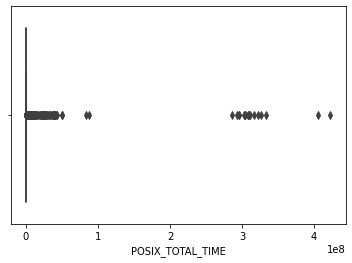

In [9]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [38]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,659457.0,1.945400e+04,5.865509e+04,0.000000e+00,1.730000e+02,3.102000e+03,1.678900e+04,8.365835e+06
POSIX_FILENOS,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00
POSIX_DUPS,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00
POSIX_READS,659457.0,1.424209e+06,2.254194e+07,0.000000e+00,5.420000e+03,1.176620e+05,1.575523e+06,5.071598e+09
POSIX_WRITES,659457.0,3.436807e+06,2.971662e+07,0.000000e+00,4.763000e+03,1.358550e+05,1.301497e+06,9.728632e+09
POSIX_SEEKS,659457.0,1.242548e+06,3.755222e+07,0.000000e+00,2.120000e+02,5.912800e+04,1.249606e+06,1.247776e+10
POSIX_STATS,659457.0,9.435913e+04,2.052229e+05,0.000000e+00,3.870000e+02,3.199000e+03,1.264970e+05,1.437219e+07
POSIX_MMAPS,659457.0,3.144531e+00,2.342422e+02,-6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.394900e+04
POSIX_FSYNCS,659457.0,1.338135e+01,2.913910e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.097152e+06
POSIX_RENAME_SOURCES,659457.0,-1.082080e+03,1.093889e+04,-2.839714e+06,-1.012000e+03,-2.590000e+02,-1.700000e+01,-1.000000e+00


In [10]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [11]:
def plot_df_w_filter(df,filterexp,x_column,coord,bytes_read_copy):
    df[filterexp].plot.scatter(x=x_column,y="POSIX_TOTAL_TIME", ax=coord,
                                                 c=np.log10(color_data[filterexp]),colorbar=True)

In [20]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    plot_df_w_filter(df_no_outliers,filter_spec,"nprocs",axs[0,0])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_CONSEC_READS",axs[0,2])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1,0],bytes_written_copy)
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_CONSEC_WRITES",axs[1,1],bytes_written_copy)
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_BYTES_READ",y="POSIX_TOTAL_TIME",ax=axs[1,2])
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_BYTES_WRITTEN",y="POSIX_TOTAL_TIME",ax=axs[2,0])
    df_no_outliers[filter_spec].plot.scatter(x="rank",y="POSIX_TOTAL_TIME",ax=axs[2,1])
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_SEEKS",y="POSIX_TOTAL_TIME",ax=axs[2,2])
    plt.show()

In [13]:
most_used_apps[0:20]

Index(['SpEC', 'CCTM_v52_Linux2_x86_64intel', 'mosst_dynamo.x', 'vasp_gam',
       'Spells', 'pw.x', 'ApplyObservers', 'flash4', 'enzo.exe', 'scheduler.x',
       'lmp_new', 'ior', 'caliop', 'mdtest', 'sord-mO', 'PIOL-FFD', 'Hsigma',
       'nwchem', 'nek5000', 'h_r_f'],
      dtype='object', name='app')

In [18]:
df_no_outliers[df_no_outliers.path == "Spells"].describe()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.000000,40500.000000,40500.000000,4.050000e+04,4.050000e+04,4.050000e+04,4.050000e+04,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.00000,4.050000e+04,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,4.050000e+04,4.050000e+04,4.050000e+04,4.050000e+04,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.000000,40500.0,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.0,40500.0,40500.0,40500.0,40500.0,40500.000000,40500.000000,40500.0
mean,387267.383951,165.092494,-24.935358,-24.935358,1507.261852,1640.953531,2594.903481,471.203728,0.0,0.0,-24.935358,-24.935358,5693.718815,2.084595e+06,1.833385e+07,2.071088e+07,1.835544e+07,344.287654,209.024247,908.737852,1359.967407,223.988938,152.093136,199.482864,2697.03600,2.614662e+07,82621.005383,49938.362272,998.453926,408.558543,57.724123,40.207827,2.317432,0.0,0.0,0.0,0.0,0.0,383.981037,269.986667,639.146568,319.423531,28.415728,0.0,0.0,0.0,0.0,0.0,8.261497e+06,1.404846e+06,5.016736e+05,4.690384e+05,205.065358,132.072420,110.120938,109.070099,29254.338963,92204.009802,197556.495506,7065.862148,553.175531,252.101679,231.782568,187.338642,9.516222,0.0,7.933481,0.0,998.453926,408.558543,57.724123,40.207827,2.317432,0.0,0.0,0.0,0.0,0.0,383.981037,269.986667,639.146568,319.423531,28.415728,0.0,0.0,0.0,0.0,0.0,1.513753,0.902504,11.0
std,174562.212488,12.536568,3.412209,3.412209,165.854529,11.599818,129.085699,28.256465,0.0,0.0,3.412209,3.412209,40.012859,1.367072e+06,1.018713e+07,1.292258e+07,1.018713e+07,37.553664,1.931173,97.017313,9.639105,1.574092,12.530699,27.297672,141.57732,3.577961e+06,99039.228492,47616.931880,62.777082,71.927311,23.373527,19.068539,4.840076,0.0,0.0,0.0,0.0,0.0,2.698444,1.897343,101.881349,97.245353,41.807674,0.0,0.0

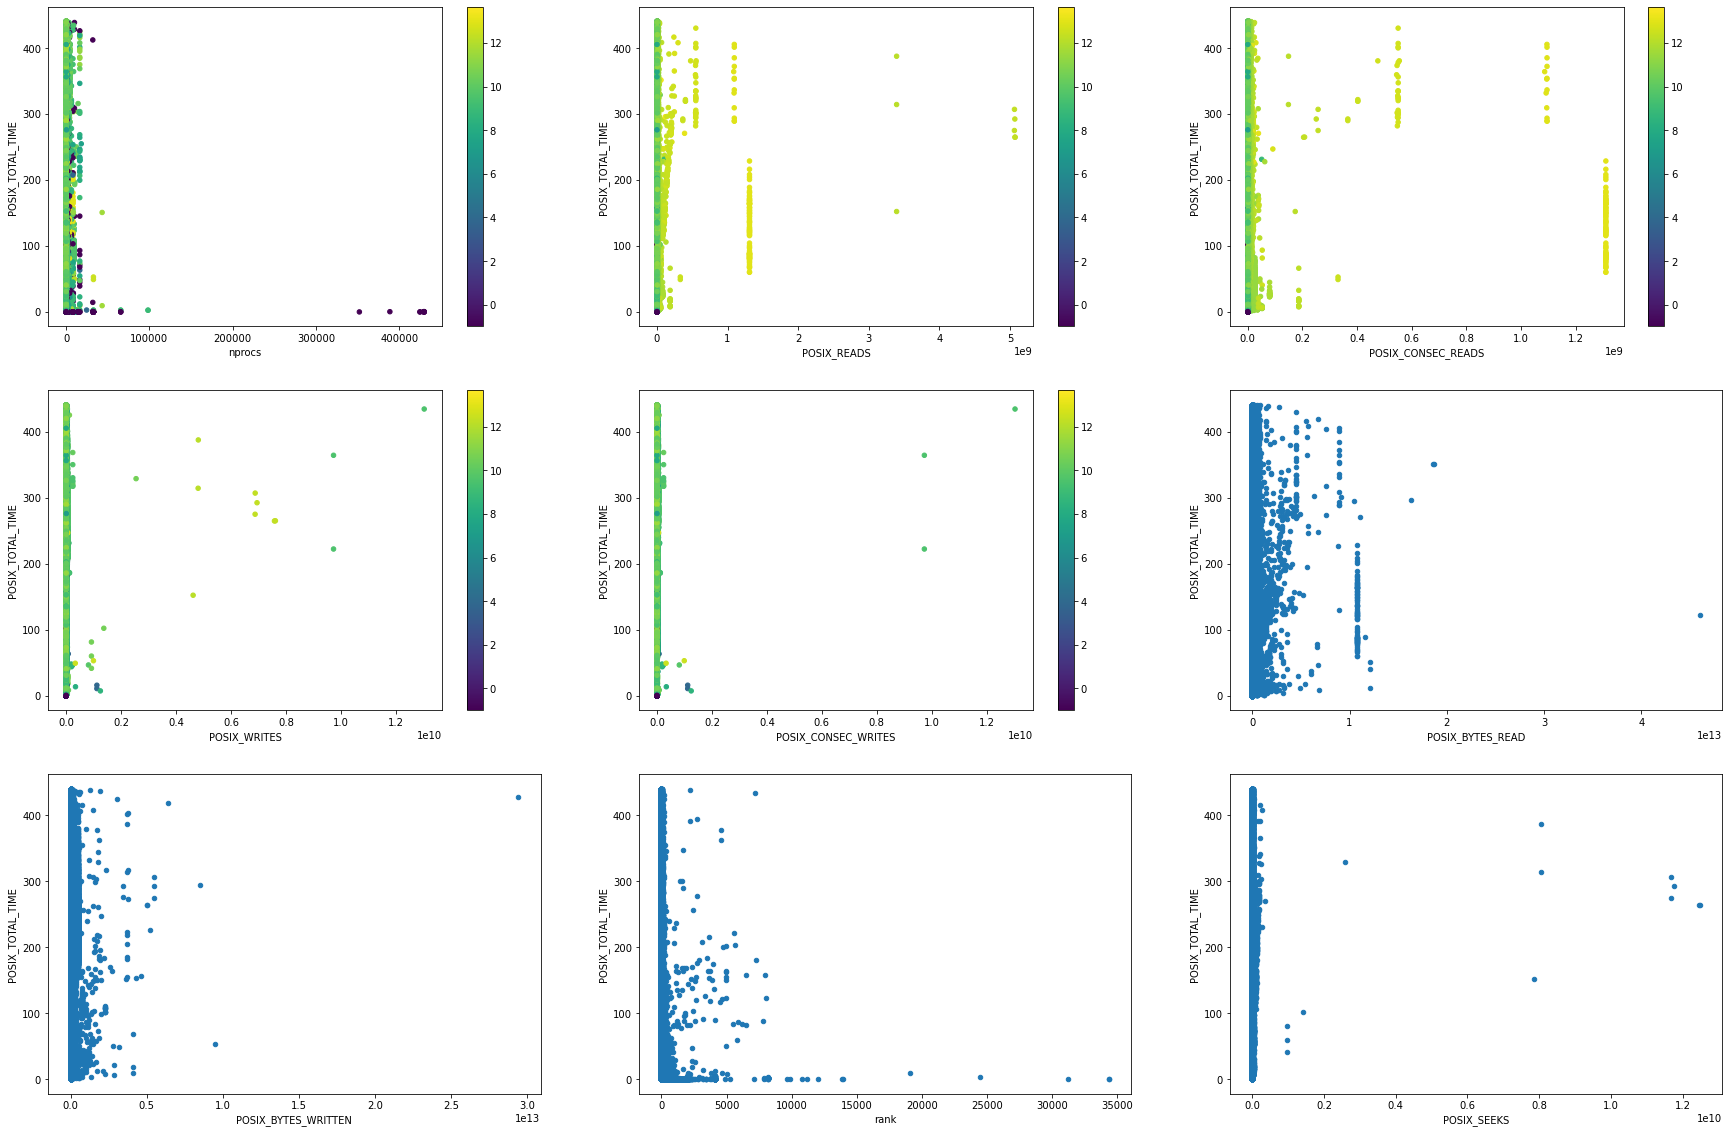

In [21]:
filter_spec = df_no_outliers.app.isin(most_used_apps[0:5])
plot_mosaic((filter_spec == False) | (filter_spec == True))

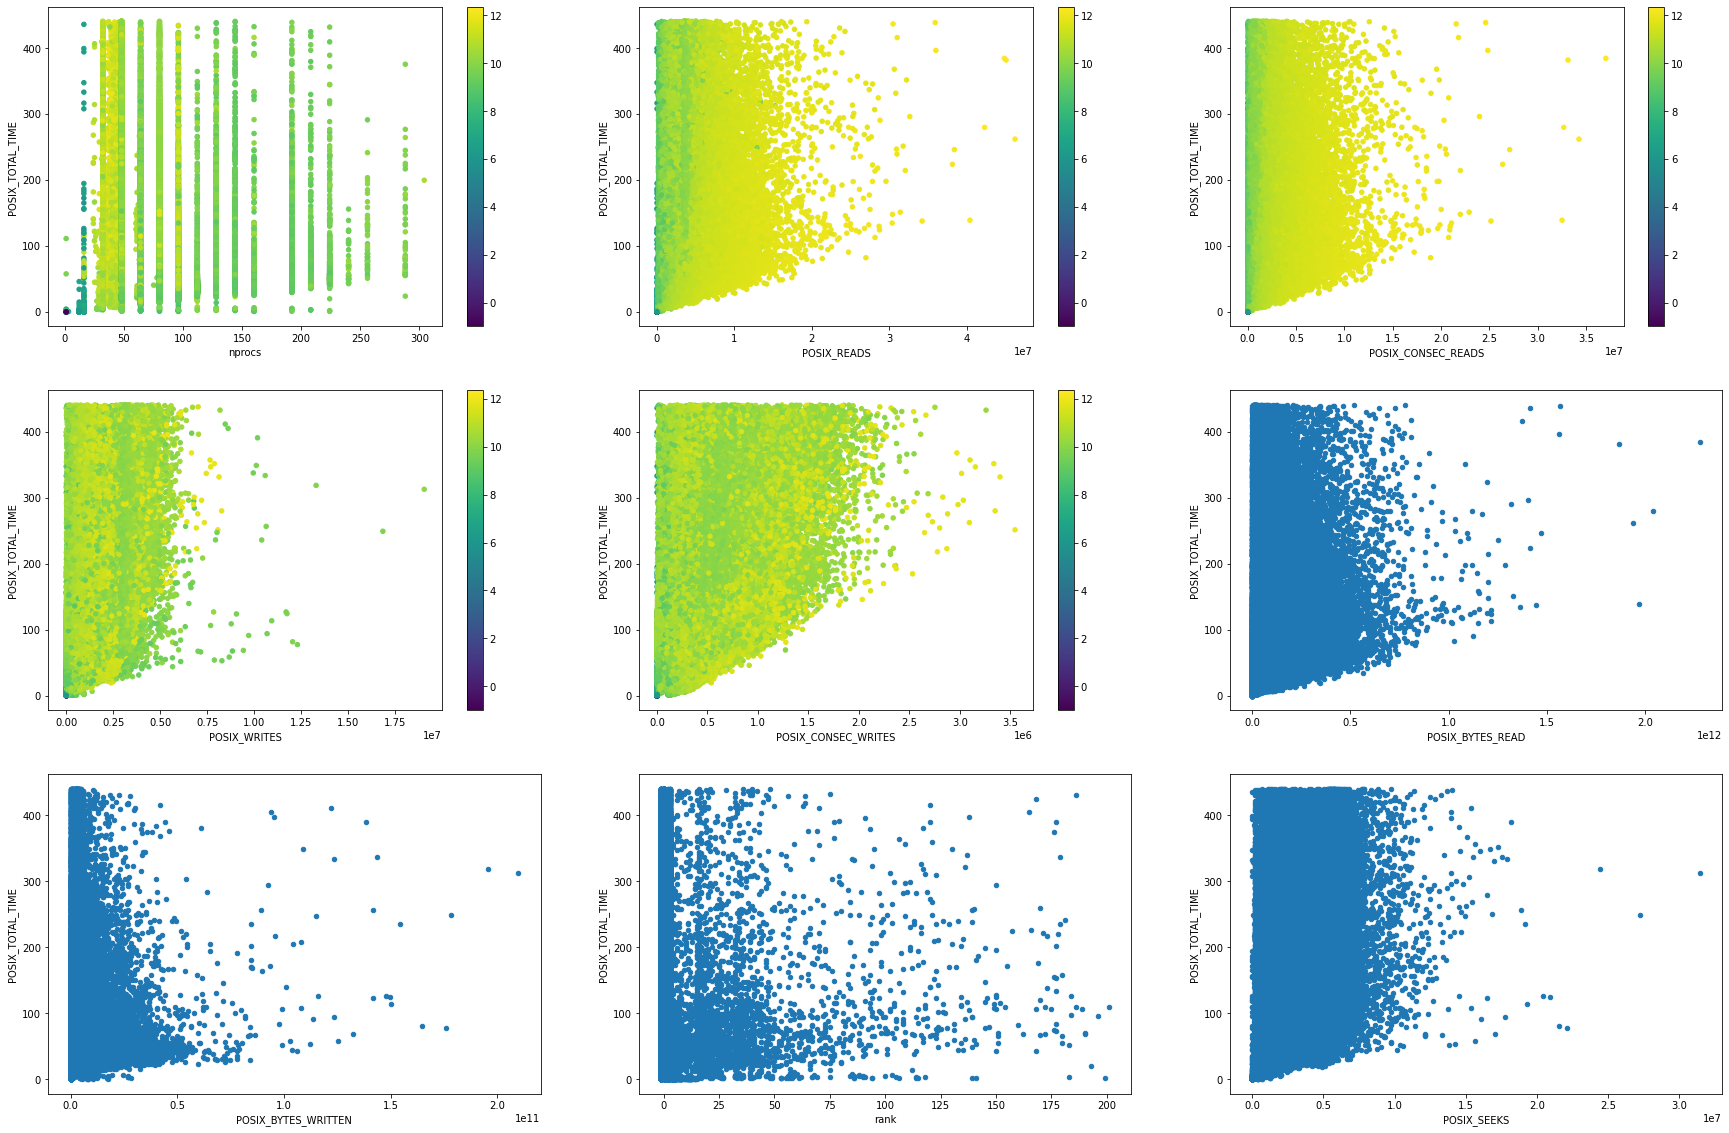

In [22]:
filter_spec = (df_no_outliers.app == "SpEC")
plot_mosaic(filter_spec == True)

In [12]:
df_no_outliers[(df_no_outliers.app == "SpEC") & (df_no_outliers.POSIX_TOTAL_TIME > 600000)]

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,app
45432,4830,-750,-750,228452,143300,210683,15997,0,1,-750,-750,39420,1575708028,223316960,1608125107,220281683,42649,118614,97458,137627,2649,4736,6000,361494,786432000,5492984,2119293,35744,159666,10397,20657,1988,0,0,0,0,0,116193,7389,15755,3548,415,0,0,0,0,0,452650110,953414242,316168444,156194724,8397,4721,2525,1078,3292443,3894354,3754296,3310028,238990,28789,14353,10179,140,2728986,101,2728986,35744,159666,10397,20657,1988,0,0,0,0,0,116193,7389,15755,3548,415,0,0,0,0,0,-1,825327.534782,48,SpEC


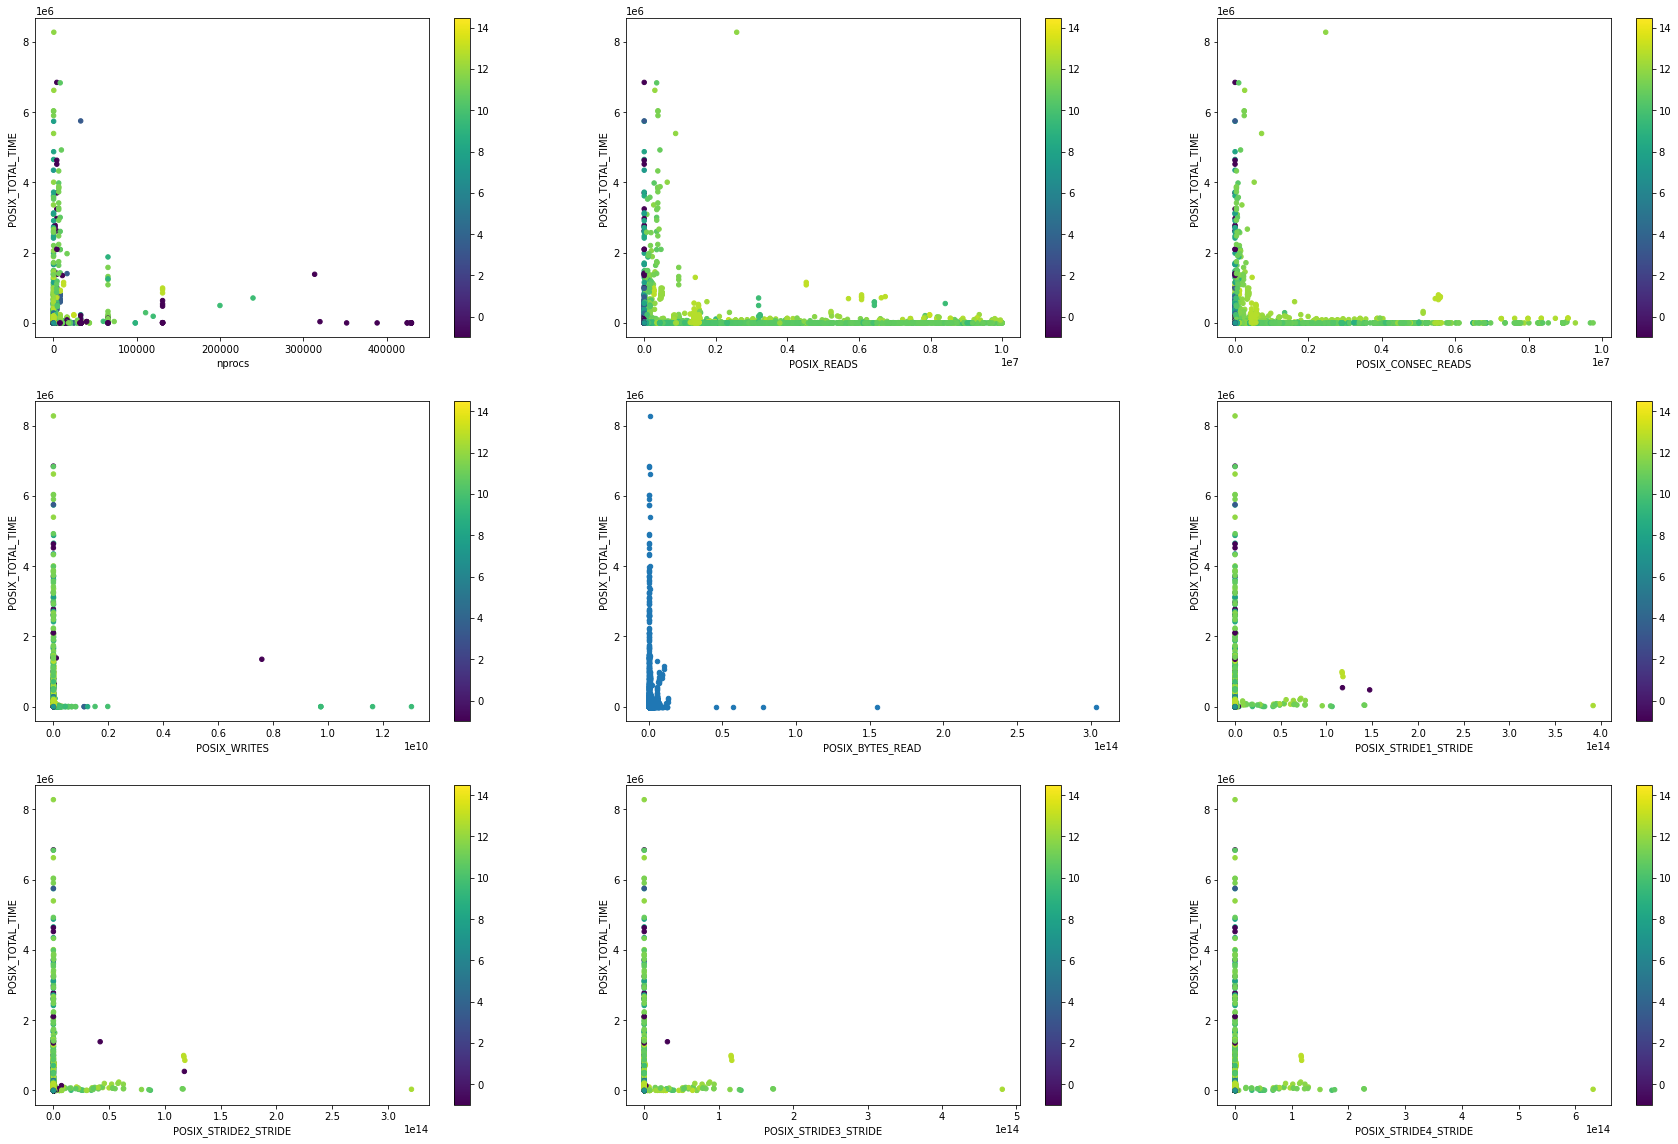

In [32]:
filter_spec = (df_no_outliers.app == "SpEC") | (df_no_outliers.POSIX_TOTAL_TIME >= 1e7) | (df_no_outliers.POSIX_READS >= 1e7)
plot_mosaic(filter_spec == False)

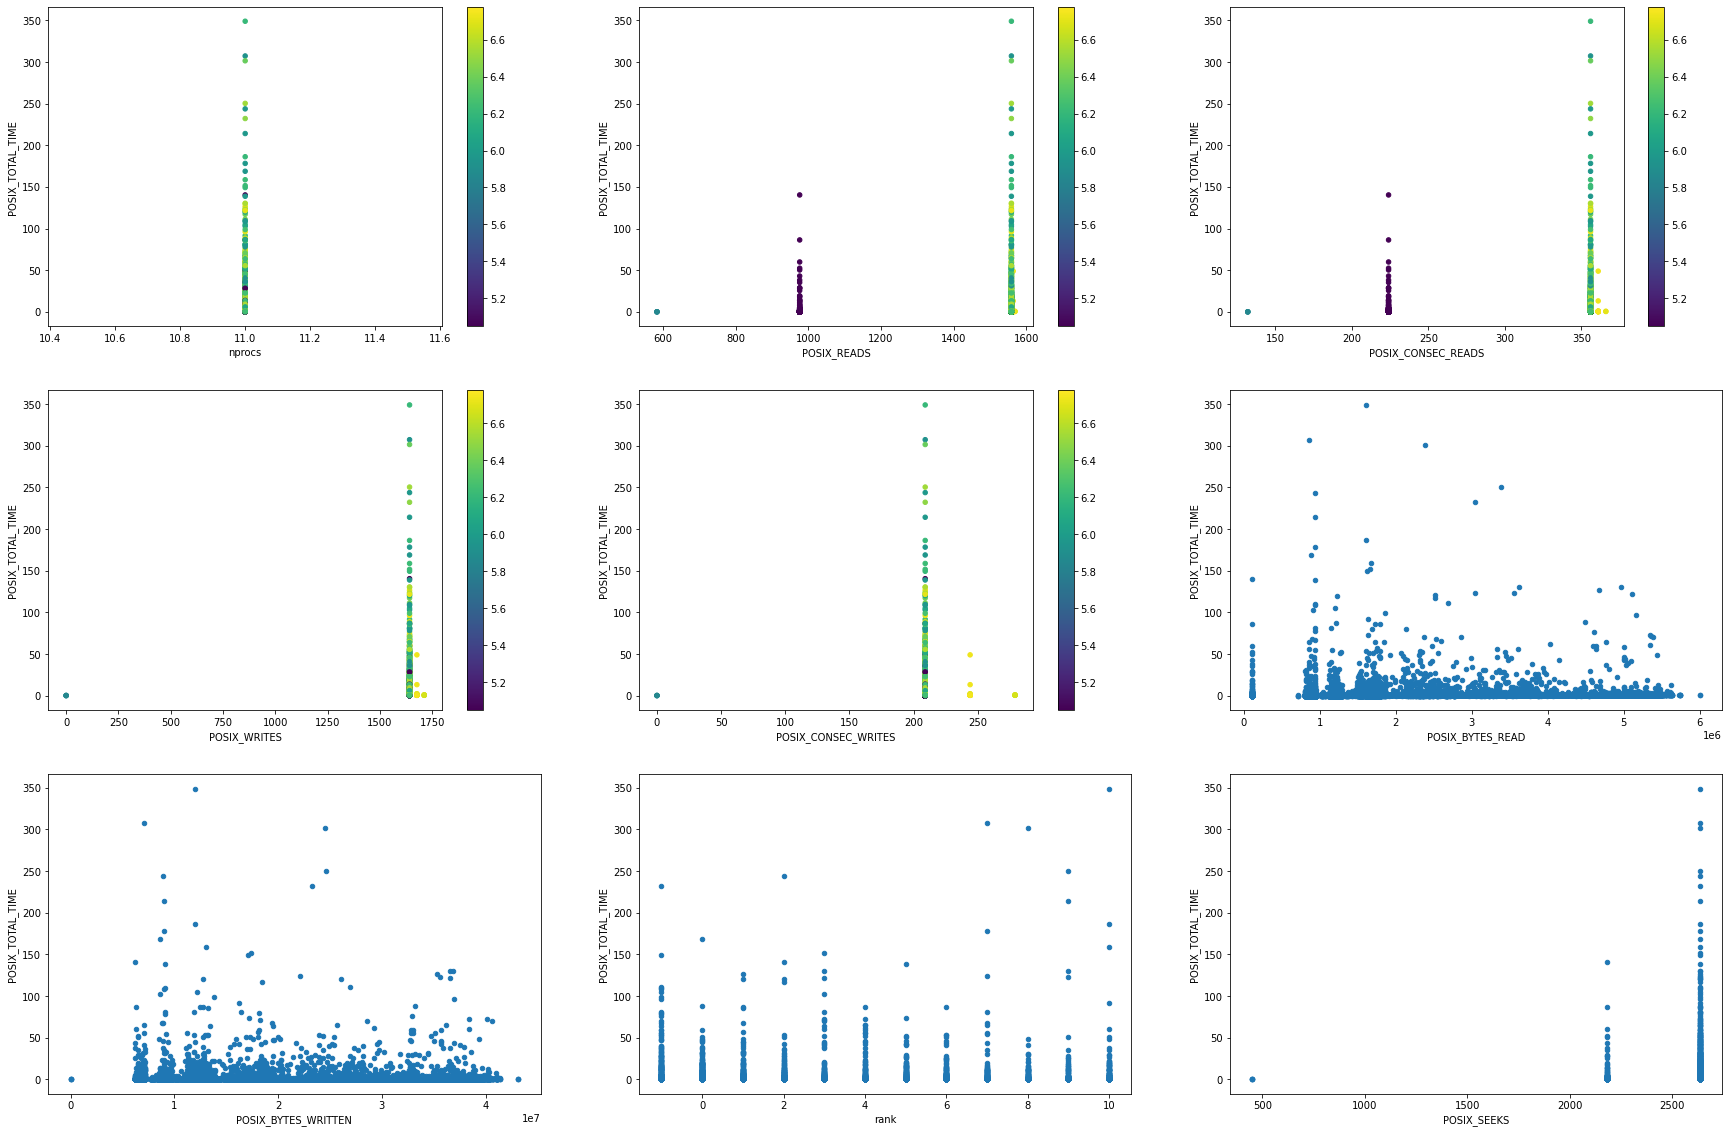

In [23]:
filter_spec = (df_no_outliers.app == "Spells")
plot_mosaic(filter_spec == True)

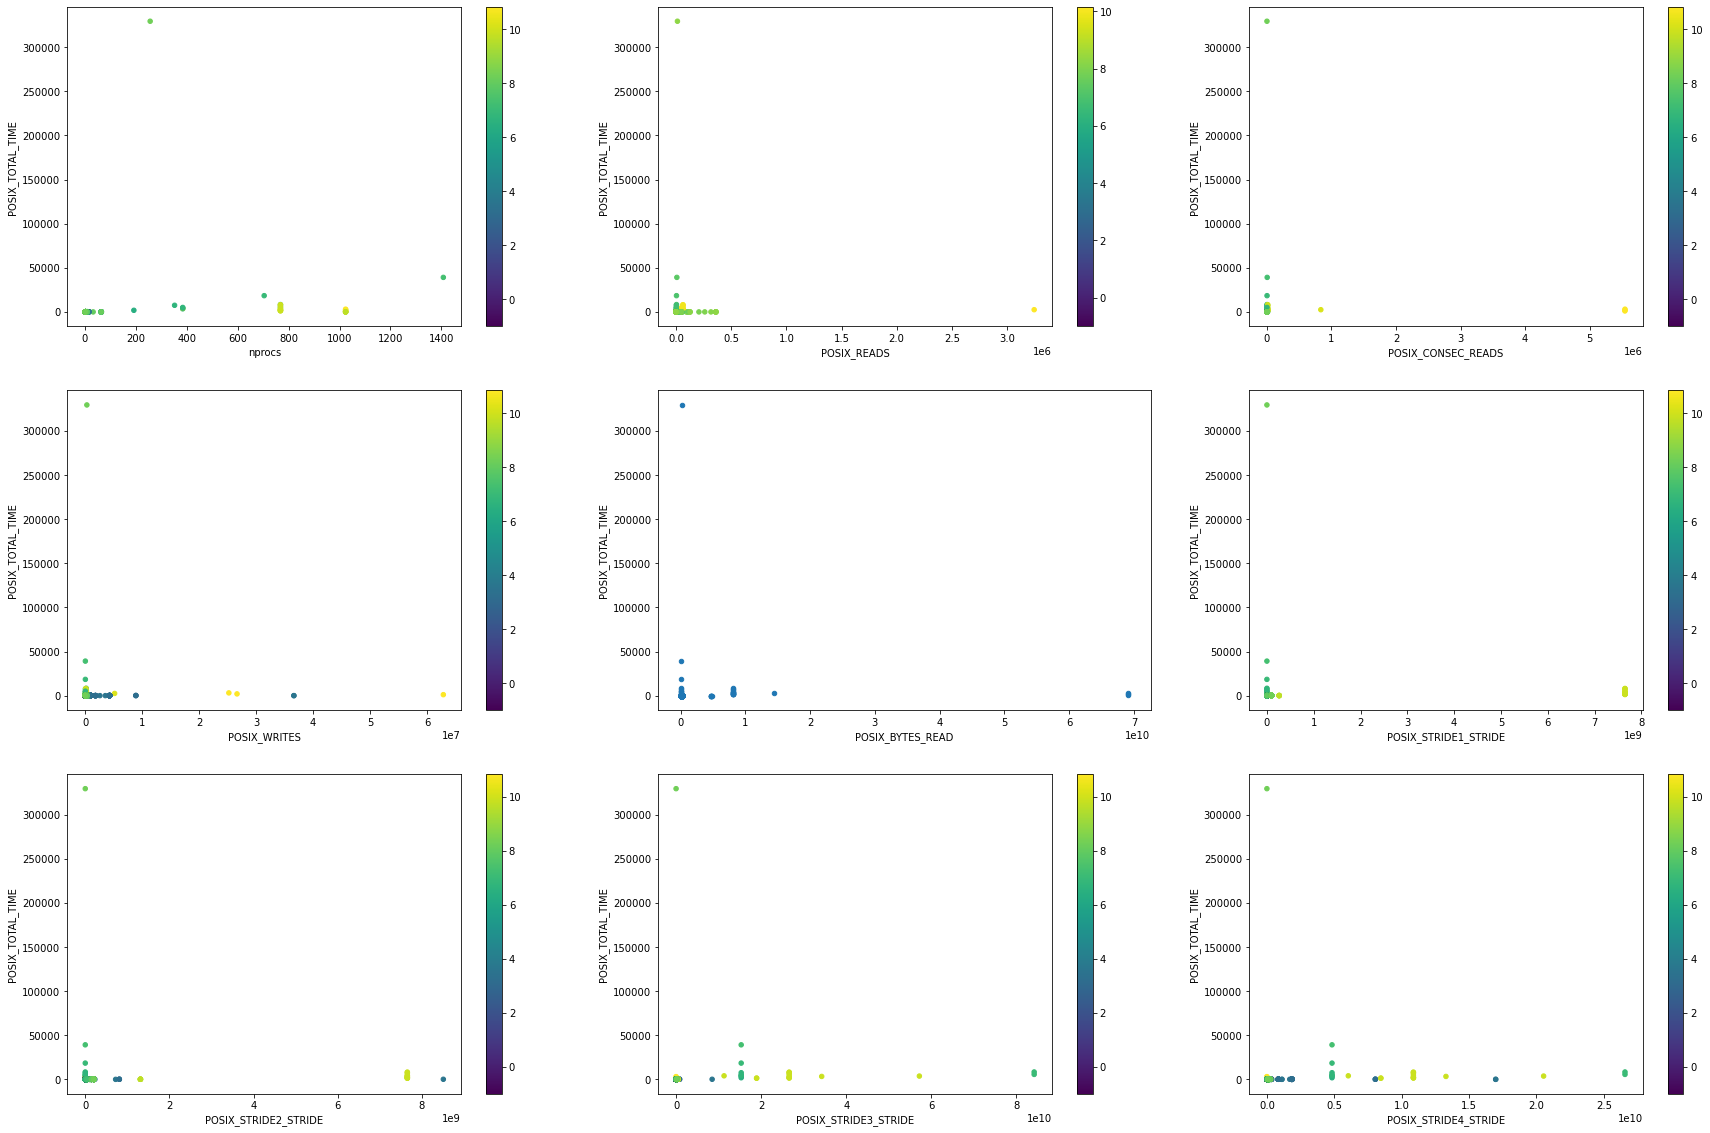

In [20]:
filter_spec = (df_no_outliers.app == "flash4")
plot_mosaic(filter_spec == True)

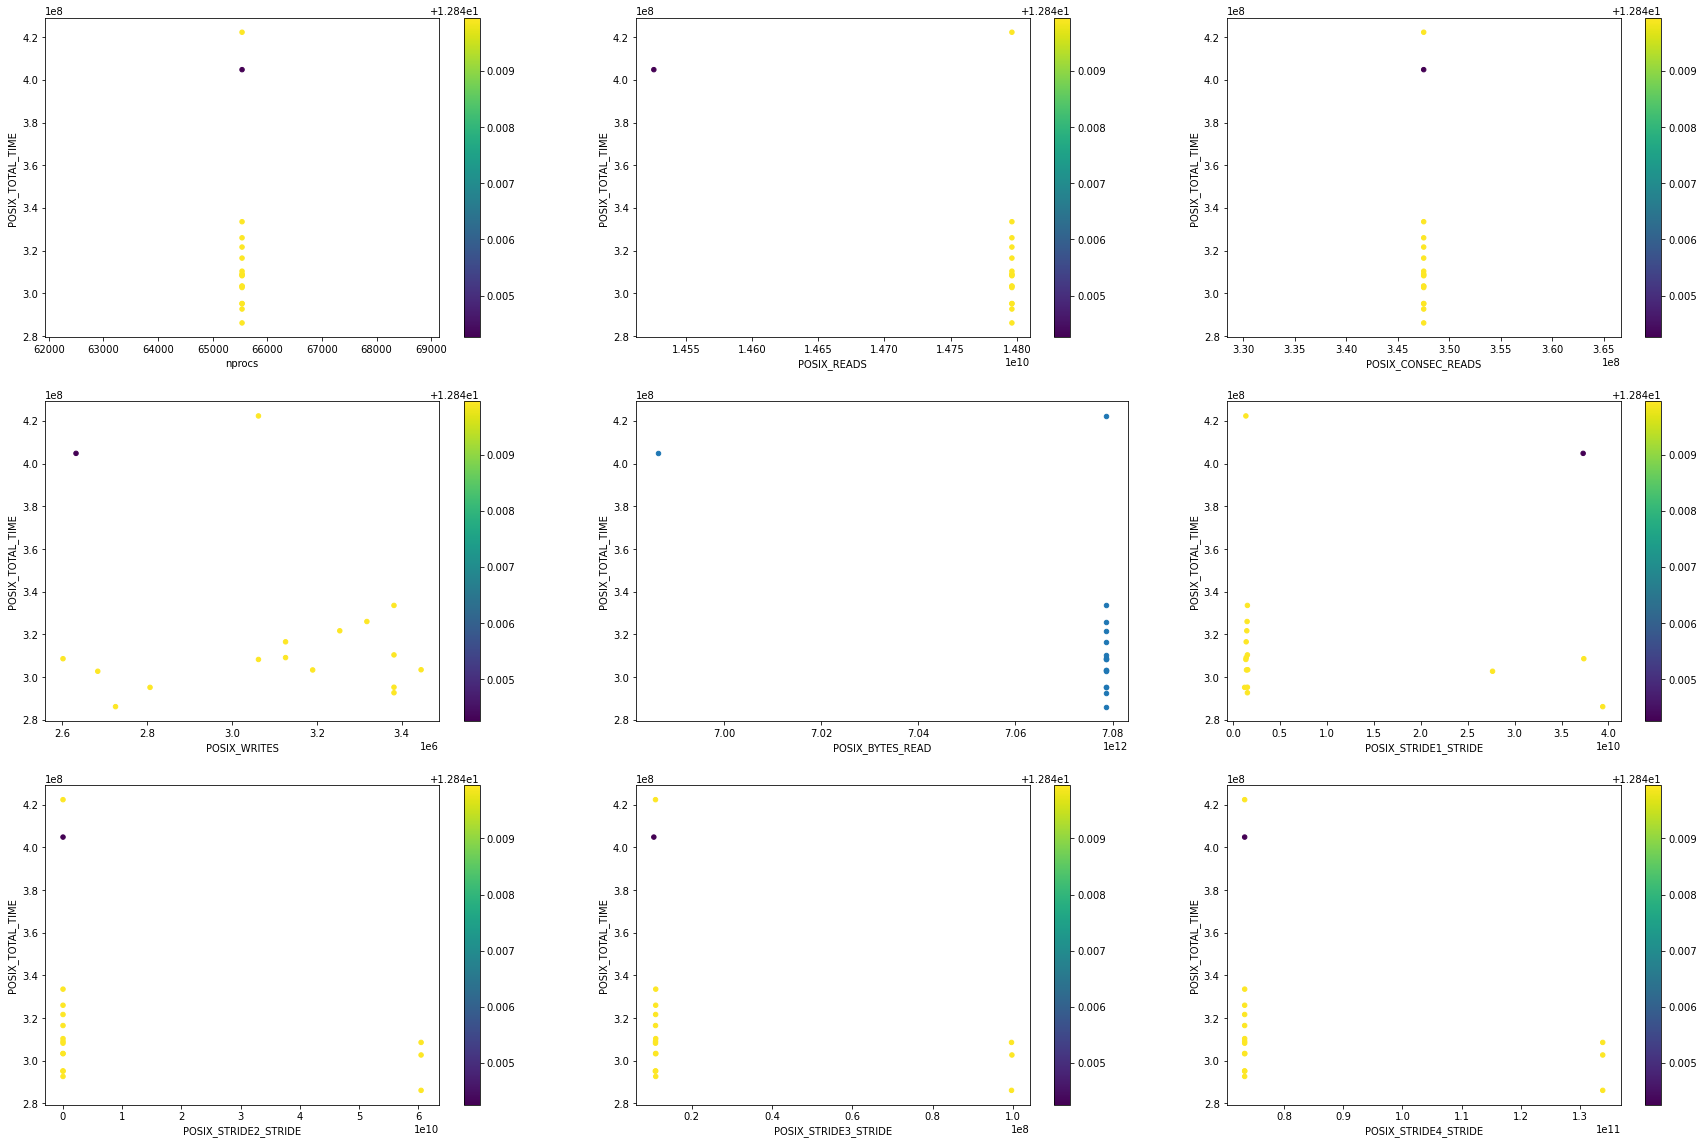

In [24]:
filter_spec = (df_no_outliers.POSIX_TOTAL_TIME > 1e8)
plot_mosaic(filter_spec == True)

In [11]:
df[(df.POSIX_BYTES_READWRITE < 4e12) & (df.POSIX_TOTAL_TIME > 400) & (df.nprocs == 64)].loc[:,["POSIX_TOTAL_TIME","nprocs",
                                                                                              "POSIX_MEM_NOT_ALIGNED","POSIX_FILE_NOT_ALIGNED"]]

,POSIX_TOTAL_TIME,nprocs,POSIX_MEM_NOT_ALIGNED,POSIX_FILE_NOT_ALIGNED
851,2681.710634,64,36452160,100342229
1059,580.633046,64,8896,31800352
1256,1496.883683,64,20349376,56020091
1330,1279.954368,64,8293760,22847116
1410,983.000908,64,8896,54057998
...,...,...,...,...
759120,707.016863,64,0,221837
759205,3827.393713,64,68544,1727205
759407,532.979063,64,27123,9536056
759441,3859.056204,64,70208,1876279


In [22]:
0.001e6

1000.0

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [47]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.5654992433179975

In [48]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.3046198544865632

<AxesSubplot:>

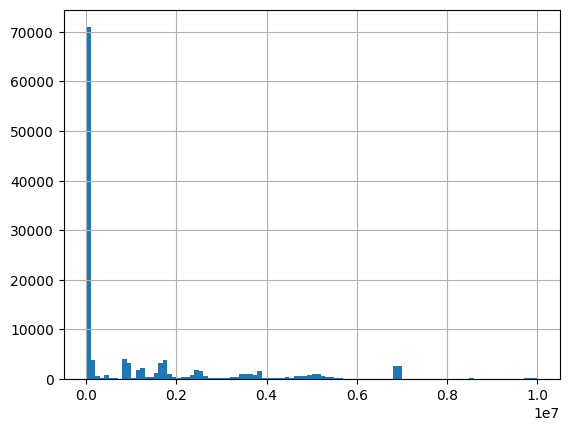

In [18]:
df_no_outliers.POSIX_BYTES_READ[df_no_outliers.POSIX_BYTES_READ < 1e7].hist(bins=100)

In [18]:
count, division = np.histogram(df_no_outliers[df_no_outliers.POSIX_READS < 1e6].POSIX_BYTES_READ,bins=10,range=(0,1e6))
division[-1] = df_no_outliers.POSIX_BYTES_READ.max() + 1
division

array([0.00000000e+00, 1.00000000e+05, 2.00000000e+05, 3.00000000e+05,
       4.00000000e+05, 5.00000000e+05, 6.00000000e+05, 7.00000000e+05,
       8.00000000e+05, 9.00000000e+05, 4.60106718e+13])

In [111]:
count

array([70913,  3796,   715,   140,   745,   252,   124,    56,  4091,
        3289], dtype=int64)

In [107]:
len(count[count == 0])

0

In [88]:
count.sum() / len(df_no_outliers)

0.4515654546088676

In [68]:
division / df_no_outliers.POSIX_BYTES_READ.max()

array([0.00000000e+00, 5.25795529e-06, 1.05159106e-05, ...,
       9.99989484e-01, 9.99994742e-01, 1.00000000e+00])

In [84]:
df_no_outliers.iloc[0].POSIX_BYTES_READ

3414717008.0

In [18]:
elem = df_no_outliers.iloc[0].POSIX_BYTES_READ
division[[False] + [elem < division[i] and elem >= division[i-1] for i in range(1,len(division))]][0]

3628830828.797637

In [20]:
alphas = pd.Series.copy(df_no_outliers[df_no_outliers.POSIX_READS < 1e6].POSIX_BYTES_READ)
alphas = alphas.apply(lambda elem: division[[False] + [elem < division[i] and elem >= division[i-1] for i in range(1,len(division))]][0])

In [25]:
alphas[df_no_outliers[df_no_outliers.POSIX_READS < 1e6].POSIX_BYTES_READ < alphas]

0         4.601067e+13
3         4.601067e+13
4         1.000000e+05
6         4.601067e+13
7         4.601067e+13
              ...     
792307    4.601067e+13
792310    4.601067e+13
792314    4.601067e+13
792322    1.000000e+05
792323    4.601067e+13
Name: POSIX_BYTES_READ, Length: 466622, dtype: float64

In [26]:
len(alphas)

466622